In [255]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
wine = fetch_ucirepo(id=109) 

# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 


In [256]:
X.shape,y.shape

((178, 13), (178, 1))

In [257]:
y['class'].unique()

array([1, 2, 3], dtype=int64)

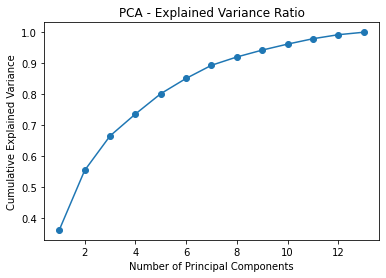

In [279]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
filterwarnings('ignore')

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA on the preprocessed dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualize explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance Ratio')
plt.show()


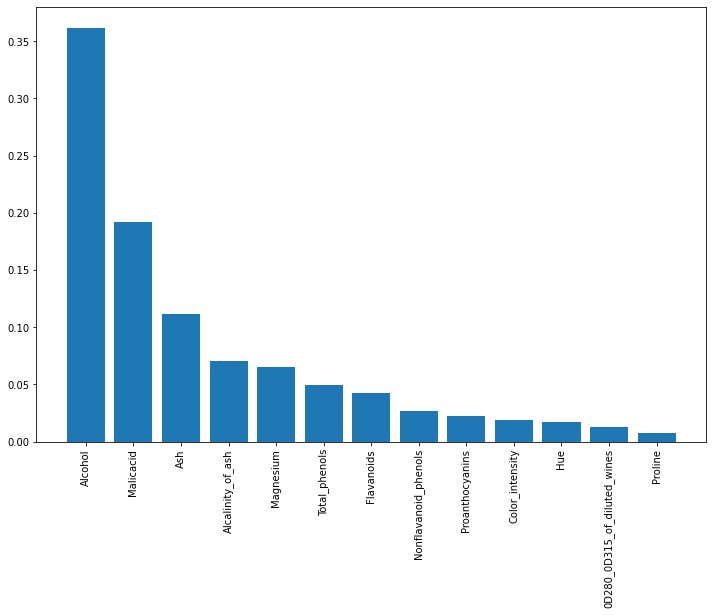

In [280]:
plt.figure(figsize=(12,8))
plt.bar(list(X.columns),explained_variance_ratio)
plt.xticks(rotation=90) 
plt.show()

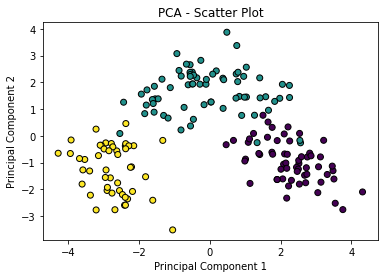

In [277]:

# Determine the optimal number of principal components based on the plot or a desired threshold
optimal_components = 8  # Adjust based on the plot or threshold

# Retain the optimal number of principal components
X_pca_optimal = X_pca[:, :optimal_components]

# Visualize the results of PCA using a scatter plot
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=y['class'], cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Scatter Plot')
plt.show()


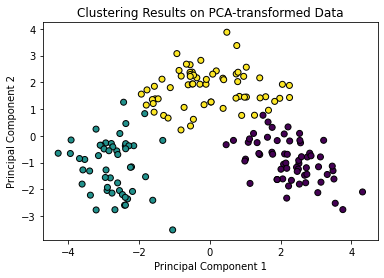

Silhouette Score: 0.3149696954705562


In [278]:

# Perform clustering on the PCA-transformed data using KMeans as an example
kmeans = KMeans(n_clusters=3) 
clusters = kmeans.fit_predict(X_pca_optimal)

# Visualize clustering results
plt.scatter(X_pca_optimal[:, 0], X_pca_optimal[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results on PCA-transformed Data')
plt.show()

# Evaluate clustering performance (example: silhouette score)
silhouette_avg = silhouette_score(X_pca_optimal, clusters)
print(f"Silhouette Score: {silhouette_avg}")


In [284]:
y_new = encoder.fit_transform(y)

In [286]:
print(confusion_matrix(y_new,clusters))
print(classification_report(y_new,clusters))

[[59  0  0]
 [ 3  3 65]
 [ 0 48  0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       0.06      0.04      0.05        71
           2       0.00      0.00      0.00        48

    accuracy                           0.35       178
   macro avg       0.34      0.35      0.34       178
weighted avg       0.34      0.35      0.34       178

